In [1]:
import os
from os import path
import re 
import tweepy
from textblob import TextBlob
import csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Twitter account details 

In [3]:
consumerKey = '******************************'
consumerSecret = '*******************************************'
accessToken = '*********************************************'
accessTokenSecret = '***************************************'

# Connecting to Twitter API

In [4]:
try: 
    auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
    auth.set_access_token(accessToken, accessTokenSecret)
    api = tweepy.API(auth)
except: 
    print("Error: Authentication Failed")

# Type of tweet to be searched & no of tweets 

In [5]:
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: demonetization
Enter how many tweets to search: 100


In [6]:
# searching for tweets
tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

# Data filtering 

In [7]:
def cleanTweet(tweet):
    # Remove Links, Special Characters etc from tweet
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

# Percentage calculation

In [8]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

# .csv file create 

In [9]:
if path.isdir("Dataset")==False:
    os.mkdir('Dataset')

In [10]:
flag=0
files=os.listdir('Dataset')
if 'output.csv' in files:
    flag=1
csvfile=open('Dataset\\output.csv', 'a', newline='')
fieldnames = ['text', 'polarity','searchKey']
writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
if flag==0:
    writer.writeheader()

# Sentiment Calculation

Weakly positive  >0 & <=0.3  ,  Positive  >0.3 & <=0.6  ,  Strongly positive  >0.6 & <=1

Weakly negative  < 0 & >= -0.3  ,  Negative  < -0.3 & >= -0.6  ,  Strongly negetive  < -0.6 & >= -1

In [11]:
(polarity,positive,wpositive,spositive,negative,wnegative,snegative,neutral) = (0,0,0,0,0,0,0,0)

In [12]:
for tweet in tweets:
    tweetText=cleanTweet(tweet.text).encode('utf-8')
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

    if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
        wpositive += 1
    elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
        positive += 1
    elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
        spositive += 1
    elif (analysis.sentiment.polarity >= -0.3 and analysis.sentiment.polarity < 0):
        wnegative += 1
    elif (analysis.sentiment.polarity >= -0.6 and analysis.sentiment.polarity < -0.3):
        negative += 1
    elif (analysis.sentiment.polarity >= -1 and analysis.sentiment.polarity < -0.6):
        snegative += 1
    
    writer.writerow({'text':tweetText, 'polarity': analysis.sentiment.polarity,'searchKey':searchTerm})

csvfile.close()

In [13]:
polarity= polarity / NoOfTerms
(positive,wpositive,spositive) = (percentage(positive, NoOfTerms),percentage(wpositive, NoOfTerms),percentage(spositive, NoOfTerms))
(negative,wnegative,snegative) = (percentage(negative, NoOfTerms),percentage(wnegative, NoOfTerms),percentage(snegative, NoOfTerms))
neutral = percentage(neutral, NoOfTerms)

# Output csv file

In [14]:
df=pd.read_csv('Dataset\\output.csv')

In [15]:
df[df['searchKey']==searchTerm][['text','polarity']].head(5)

,text,polarity
0,b'You should watch this video about sudden wav...,0.00
1,"b""RT I was sent a video of HDFC Bank MD praisi...",0.20
2,b'gus normal youtube video water demonetization',0.15
3,b'RT In one swipe the issues of stray cattle f...,0.00
4,"b""RT I was sent a video of HDFC Bank MD praisi...",0.20


# Summary

In [16]:
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

3.00% people thought it was positive
38.00% people thought it was weakly positive
2.00% people thought it was strongly positive
6.00% people thought it was negative
20.00% people thought it was weakly negative
1.00% people thought it was strongly negative
30.00% people thought it was neutral


# Conclusion

In [17]:
if (polarity == 0):
    print("**********  Neutral Result  **********")
elif (polarity > 0 and polarity <= 0.3):
    print("**********  Weakly Positive  Result  **********")
elif (polarity > 0.3 and polarity <= 0.6):
    print("**********  Positive Result  **********")
elif (polarity > 0.6 and polarity <= 1):
    print("**********  Strongly Positive Result  **********")
elif (polarity > -0.3 and polarity <= 0):
    print("**********  Weakly Negative Result  **********")
elif (polarity > -0.6 and polarity <= -0.3):
    print("**********  Negative Result **********")
elif (polarity > -1 and polarity <= -0.6):
    print("**********  Strongly Negative Result  **********")

**********  Weakly Positive  Result  **********


# Pie Chart

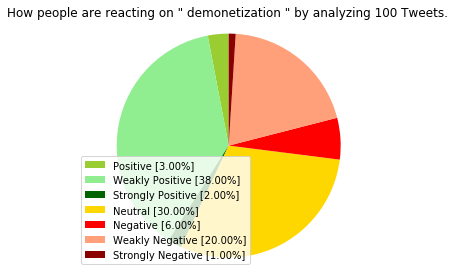

In [18]:
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on " ' + searchTerm + ' " by analyzing ' + str(NoOfTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()